In [28]:
import yfinance as yf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
data = yf.download('IBM', start="2019-01-01", end="2024-07-31")

# Display the data
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-24,184.139999,185.070007,183.149994,184.020004,182.424484,6962100
2024-07-25,186.800003,196.259995,185.300003,191.979996,190.315460,9532800
2024-07-26,190.509995,193.570007,189.619995,191.750000,190.087448,4294900
2024-07-29,193.179993,193.289993,189.179993,191.500000,189.839615,3336800
2024-07-30,191.479996,192.770004,189.089996,191.039993,189.383606,3065000


In [30]:
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

In [31]:
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

1048

In [32]:
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1048, 4) (350, 4)
(1048,) (350,)


In [33]:
# Create model 
model = clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Correct Prediction: ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

Correct Prediction:  56.285714285714285
              precision    recall  f1-score   support

          -1       0.50      0.14      0.22       153
           1       0.57      0.89      0.70       197

    accuracy                           0.56       350
   macro avg       0.54      0.52      0.46       350
weighted avg       0.54      0.56      0.49       350



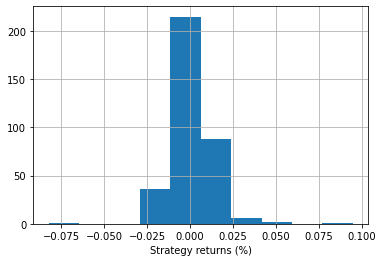

In [34]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

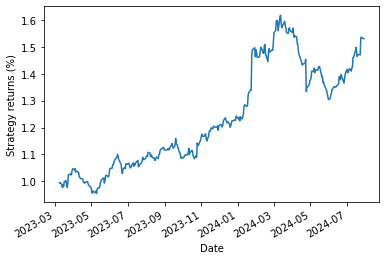

In [35]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()